# IMPORTING LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!pip install prophet
from prophet  import Prophet

# IMPORTING DATASETS

In [3]:
pc2309 = pd.read_parquet('https://storage.data.gov.my/pricecatcher/pricecatcher_2023-09.parquet')
pc2308 = pd.read_parquet('https://storage.data.gov.my/pricecatcher/pricecatcher_2023-08.parquet')
pc2307 = pd.read_parquet('https://storage.data.gov.my/pricecatcher/pricecatcher_2023-07.parquet')
pc2306 = pd.read_parquet('https://storage.data.gov.my/pricecatcher/pricecatcher_2023-06.parquet')

lookupPremise = pd.read_parquet('https://storage.data.gov.my/pricecatcher/lookup_premise.parquet')
lookupItem = pd.read_parquet('https://storage.data.gov.my/pricecatcher/lookup_item.parquet')

In [4]:
print(pc2309.shape)
print(pc2308.shape)
print(pc2307.shape)
print(pc2306.shape)

(1133814, 4)
(2485071, 4)
(2678825, 4)
(2414728, 4)


# MERGING DATASETS

In [5]:
priceCatcher =  pd.concat([pc2306, pc2307, pc2308, pc2309])

priceCatcher.shape

(8712438, 4)

In [6]:
PC = priceCatcher.merge(lookupPremise, on='premise_code')
PC = PC.merge(lookupItem, on='item_code')
PC.head()

,date,premise_code,item_code,price,premise,address,premise_type,state,district,item,unit,item_group,item_category
0,2023-06-01,2,1,9.4,PASAR BESAR IPOH,"JALAN LAKSAMANA,TAMAN JUBILEE,30300 IPOH, PERAK",Pasar Basah,Perak,Kinta,AYAM BERSIH - STANDARD,1kg,BARANGAN SEGAR,AYAM
1,2023-06-02,2,1,9.4,PASAR BESAR IPOH,"JALAN LAKSAMANA,TAMAN JUBILEE,30300 IPOH, PERAK",Pasar Basah,Perak,Kinta,AYAM BERSIH - STANDARD,1kg,BARANGAN SEGAR,AYAM
2,2023-06-03,2,1,9.4,PASAR BESAR IPOH,"JALAN LAKSAMANA,TAMAN JUBILEE,30300 IPOH, PERAK",Pasar Basah,Perak,Kinta,AYAM BERSIH - STANDARD,1kg,BARANGAN SEGAR,AYAM
3,2023-06-04,2,1,9.4,PASAR BESAR IPOH,"JALAN LAKSAMANA,TAMAN JUBILEE,30300 IPOH, PERAK",Pasar Basah,Perak,Kinta,AYAM BERSIH - STANDARD,1kg,BARANGAN SEGAR,AYAM
4,2023-06-06,2,1,9.4,PASAR BESAR IPOH,"JALAN LAKSAMANA,TAMAN JUBILEE,30300 IPOH, PERAK",Pasar Basah,Perak,Kinta,AYAM BERSIH - STANDARD,1kg,BARANGAN SEGAR,AYAM


In [7]:
PC['date'] = pd.to_datetime(PC['date'])
PC = PC.sort_values(by='date')
PC.reset_index(drop=True, inplace=True)
PC.head()

,date,premise_code,item_code,price,premise,address,premise_type,state,district,item,unit,item_group,item_category
0,2023-06-01,2,1,9.4,PASAR BESAR IPOH,"JALAN LAKSAMANA,TAMAN JUBILEE,30300 IPOH, PERAK",Pasar Basah,Perak,Kinta,AYAM BERSIH - STANDARD,1kg,BARANGAN SEGAR,AYAM
1,2023-06-01,10855,360,1.3,MYDIN ( SINAR KOTA ),"BANGUNAN SINAR KOTA,NO. 58, JALAN TUN PERAK,",Pasar Raya / Supermarket,W.P. Kuala Lumpur,Bukit Bintang,SUP BUNJUT ADABI,8 g,BARANGAN BERBUNGKUS,REMPAH RATUS (BERBUNGKUS)
2,2023-06-01,10935,360,1.4,KWEEK CHIU THUNG,"AS 0111824 K15,KUALA SANGLANG,02800 KANGAR, PE...",Kedai Runcit,Perlis,Arau,SUP BUNJUT ADABI,8 g,BARANGAN BERBUNGKUS,REMPAH RATUS (BERBUNGKUS)
3,2023-06-01,10975,360,1.4,TF VALUE MART BATU GAJAH,"PLOT 1, JALAN BHARU 1,BANDAR BARU,BATU GAJAH,",Pasar Raya / Supermarket,Perak,Kinta,SUP BUNJUT ADABI,8 g,BARANGAN BERBUNGKUS,REMPAH RATUS (BERBUNGKUS)
4,2023-06-01,11136,360,1.4,PASARAYA GRAND UNION BUKIT BERUNTUNG,"NO 1 JALAN KEMUNTING,BANDAR BUKIT BERUNTUNG,48...",Pasar Raya / Supermarket,Selangor,Hulu Selangor,SUP BUNJUT ADABI,8 g,BARANGAN BERBUNGKUS,REMPAH RATUS (BERBUNGKUS)


# HANDLING MISSING VALUES

In [8]:
PC.columns = PC.columns.str.strip()
PC = PC.drop(columns=['address', 'premise_code', 'item_code', 'premise', 'item', 'unit'])
PC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8712438 entries, 0 to 8712437
Data columns (total 7 columns):
 #   Column         Dtype         
---  ------         -----         
 0   date           datetime64[ns]
 1   price          float64       
 2   premise_type   object        
 3   state          object        
 4   district       object        
 5   item_group     object        
 6   item_category  object        
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 465.3+ MB


In [9]:
print(PC.isnull().sum())

date             0
price            0
premise_type     5
state            5
district         5
item_group       0
item_category    0
dtype: int64


In [10]:
PC= PC.dropna()

In [11]:
print(PC.isnull().sum())

date             0
price            0
premise_type     0
state            0
district         0
item_group       0
item_category    0
dtype: int64


In [12]:
# PC.to_csv('PriceCatcher_June-Sept23', index=False)

# EDA

In [13]:
PC['premise_type'].value_counts()

Pasar Raya / Supermarket    4507392
Pasar Basah                 1998052
Hypermarket                 1432124
Pasar Mini                   463575
Kedai Runcit                 309192
Borong                         2098
Name: premise_type, dtype: int64

In [14]:
PC['item_group'].value_counts()

BARANGAN SEGAR            4820470
BARANGAN BERBUNGKUS       2612496
BARANGAN KERING            980593
SUSU DAN BARANGAN BAYI     188957
MINUMAN                     60949
PRODUK KEBERSIHAN           48968
Name: item_group, dtype: int64

In [15]:
avgPrice_byState = pd.pivot_table(PC, values='price', index='item_category', columns='state', aggfunc='mean' )
avgPrice_byState['AVG'] = avgPrice_byState.mean(axis=1)
avgPrice_byState = pd.DataFrame(avgPrice_byState)
avgPrice_byState.head()

state,Johor,Kedah,Kelantan,Melaka,Negeri Sembilan,Pahang,Perak,Perlis,Pulau Pinang,Sabah,Sarawak,Selangor,Terengganu,W.P. Kuala Lumpur,W.P. Labuan,W.P. Putrajaya,AVG
item_category,,,,,,,,,,,,,,,,,
AYAM,13.577179,12.903442,13.272509,13.089349,13.471475,13.481781,13.593067,12.420039,13.856764,15.464178,14.199018,14.095669,13.603373,14.287011,15.974913,14.259325,13.846818
BAHAN LAUT,24.496317,23.591666,23.368715,25.298830,25.179890,25.944774,24.764527,21.014229,24.698653,16.993632,22.824065,27.820819,23.155818,32.740916,14.504126,30.589502,24.186655
BAHAN-BAHAN MINUMAN,13.237343,12.707731,14.143296,13.008610,12.621881,13.237875,12.742415,13.494410,12.770362,14.074168,14.445604,12.725152,14.467247,13.051727,14.117201,13.253155,13.381136
BAWANG,6.265794,6.580701,5.789411,6.876055,6.787348,6.027885,6.795966,5.888576,7.259377,7.594795,7.077658,6.578446,5.512450,7.153185,7.791461,6.300299,6.642463
BERAS,21.096740,18.606463,16.339064,21.078862,22.636934,18.660994,19.331672,14.452741,20.990872,28.188903,29.572137,21.295220,21.356814,21.458685,28.432201,22.579985,21.629893


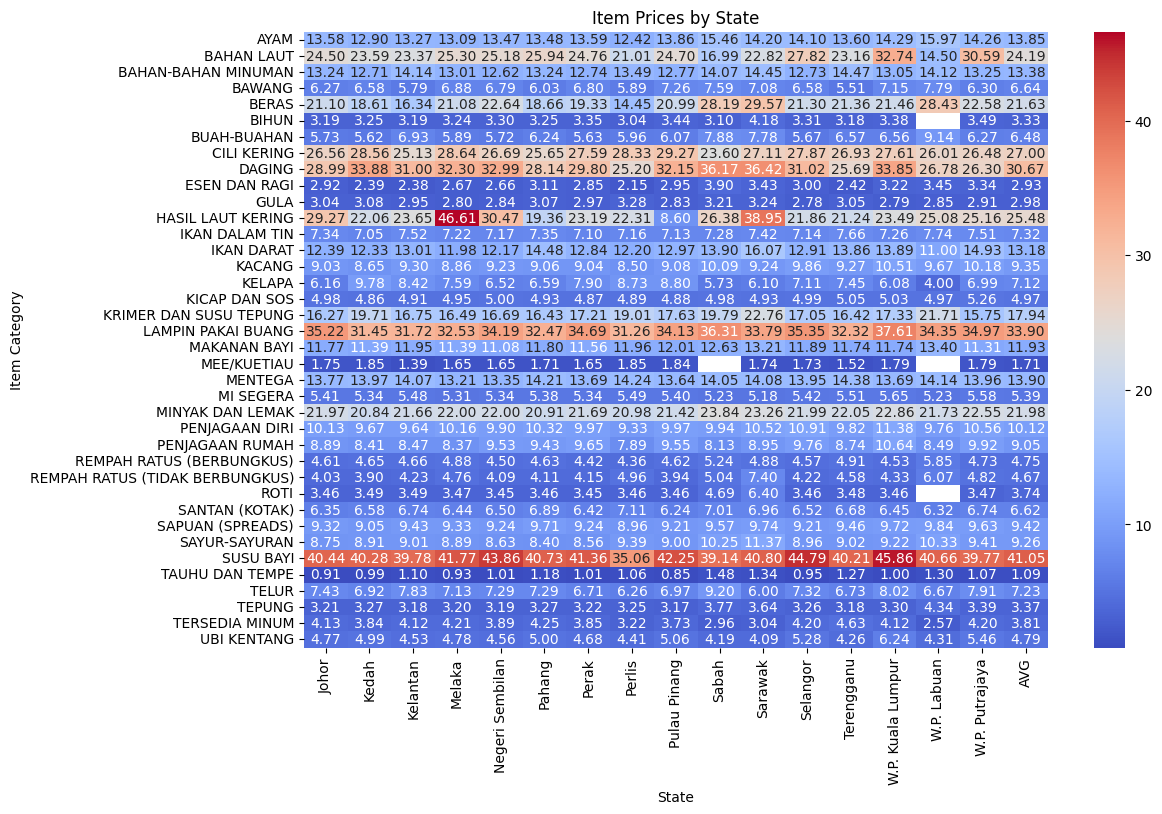

In [16]:
plt.figure(figsize=(12, 8))
sns.heatmap(avgPrice_byState, annot=True, cmap='coolwarm', fmt=".2f", cbar=True)

# Customize the heatmap appearance (optional)
plt.title('Item Prices by State')
plt.xlabel('State')
plt.ylabel('Item Category')
plt.show()

In [17]:
avgPrice_byPremise = pd.pivot_table(PC, values='price', index='item_category', columns='premise_type', aggfunc='mean' )
avgPrice_byPremise['AVG'] = avgPrice_byPremise.mean(axis=1)
avgPrice_byPremise = pd.DataFrame(avgPrice_byPremise)
avgPrice_byPremise.head()

premise_type,Borong,Hypermarket,Kedai Runcit,Pasar Basah,Pasar Mini,Pasar Raya / Supermarket,AVG
item_category,,,,,,,
AYAM,9.002885,13.983422,12.996915,13.321324,13.425203,14.120830,12.808430
BAHAN LAUT,23.107947,27.144325,21.862335,24.482651,23.019843,26.590156,24.367876
BAHAN-BAHAN MINUMAN,NaN,12.859691,14.239569,14.501149,13.368043,13.267463,13.647183
BAWANG,6.416969,5.818822,6.803070,7.812760,6.832601,6.199533,6.647293
BERAS,5.738710,24.211281,18.893472,10.042210,20.389553,22.922370,17.032933


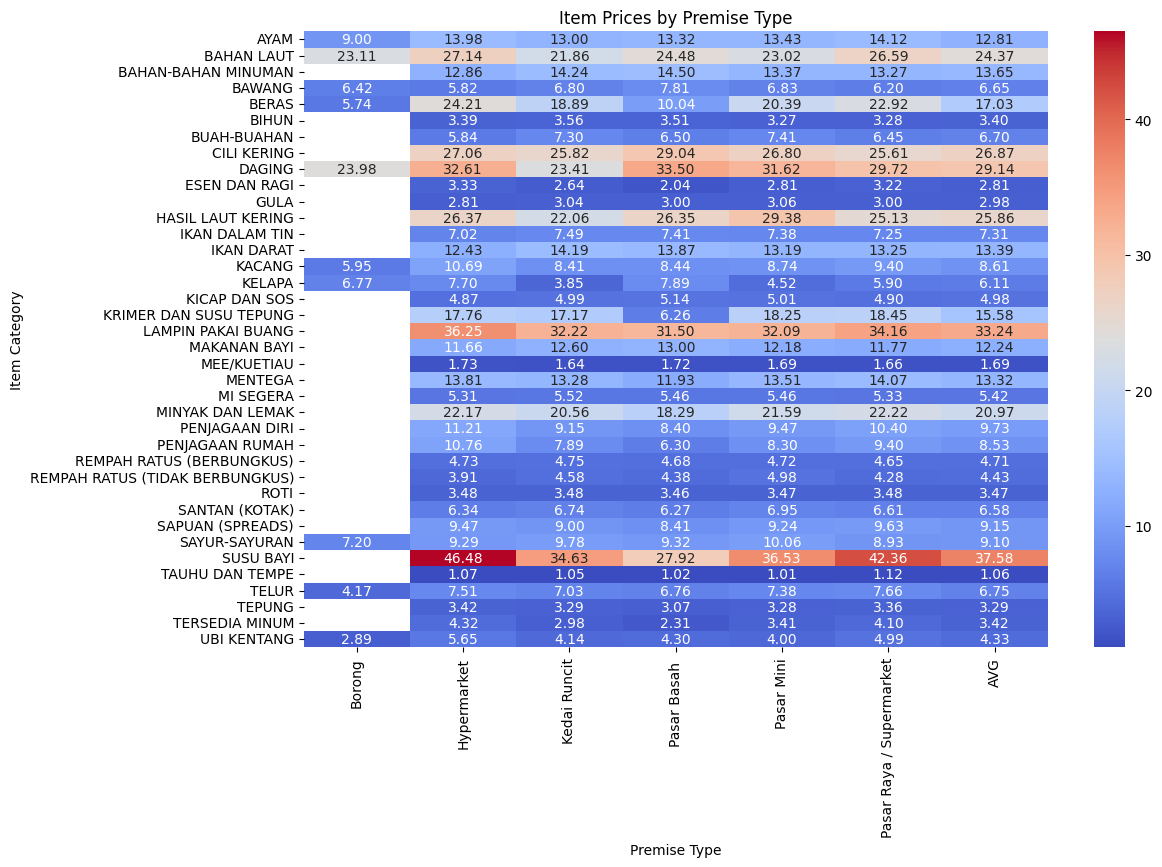

In [18]:
plt.figure(figsize=(12, 8))
sns.heatmap(avgPrice_byPremise, annot=True, cmap='coolwarm', fmt=".2f", cbar=True)

# Customize the heatmap appearance (optional)
plt.title('Item Prices by Premise Type')
plt.xlabel('Premise Type')
plt.ylabel('Item Category')
plt.show()

In [19]:
avgPrice =  pd.pivot_table(PC, values='price', index='date', columns='item_category', aggfunc='mean')
avgPrice = avgPrice.fillna(method='ffill')
avgPrice = avgPrice.fillna(method='bfill')
avgPrice.head()

item_category,AYAM,BAHAN LAUT,BAHAN-BAHAN MINUMAN,BAWANG,BERAS,BIHUN,BUAH-BUAHAN,CILI KERING,DAGING,ESEN DAN RAGI,...,ROTI,SANTAN (KOTAK),SAPUAN (SPREADS),SAYUR-SAYURAN,SUSU BAYI,TAUHU DAN TEMPE,TELUR,TEPUNG,TERSEDIA MINUM,UBI KENTANG
date,,,,,,,,,,,,,,,,,,,,,
2023-06-01,14.491983,26.258987,12.07,6.309297,22.030487,3.307986,6.418258,26.314876,31.101939,2.85318,...,3.475475,6.56961,9.294172,9.173257,41.597994,1.028246,7.594105,3.259209,3.370769,4.716957
2023-06-02,14.016786,26.530345,12.07,6.252842,5.900000,3.307986,6.305826,26.593060,31.262115,2.85318,...,3.475475,6.56961,9.294172,9.021693,41.597994,1.026902,7.678211,3.259209,3.370769,4.973832
2023-06-03,14.012453,26.399959,12.07,6.281520,5.900000,3.307986,6.439086,26.646753,31.943195,2.85318,...,3.475475,6.56961,9.294172,9.185592,41.597994,1.049535,7.597921,3.259209,3.370769,4.855959
2023-06-04,14.000327,26.349349,12.07,6.258423,19.700000,3.283333,6.445009,26.652986,31.908968,2.85000,...,3.475000,6.29750,9.561739,9.182333,40.304348,1.053762,7.598975,3.636667,3.370769,4.856983
2023-06-06,14.083487,26.297032,12.07,6.333660,19.700000,3.283333,6.473730,26.840372,31.768142,2.85000,...,3.475000,6.29750,9.561739,9.211716,40.304348,1.042628,7.385803,3.636667,3.370769,4.911215


In [20]:
max_prices = avgPrice.max(axis=0)
min_prices = avgPrice.min(axis=0)

price_summary = pd.DataFrame({'Max Price': max_prices, 'Min Price': min_prices})
print(price_summary)

                                 Max Price  Min Price
item_category                                        
AYAM                             14.491983  13.531901
BAHAN LAUT                       26.674810  24.575133
BAHAN-BAHAN MINUMAN              18.200000  11.623636
BAWANG                            7.145330   6.252842
BERAS                            32.250000   5.566667
BIHUN                             4.250000   2.290000
BUAH-BUAHAN                       6.607857   6.154411
CILI KERING                      27.169925  26.189802
DAGING                           32.498956  30.966731
ESEN DAN RAGI                     4.745000   1.475000
GULA                              3.366667   2.512500
HASIL LAUT KERING                27.892373  24.776027
IKAN DALAM TIN                    7.986667   4.850000
IKAN DARAT                       13.558699  13.083583
KACANG                            9.527280   9.174390
KELAPA                            7.535247   6.840448
KICAP DAN SOS               

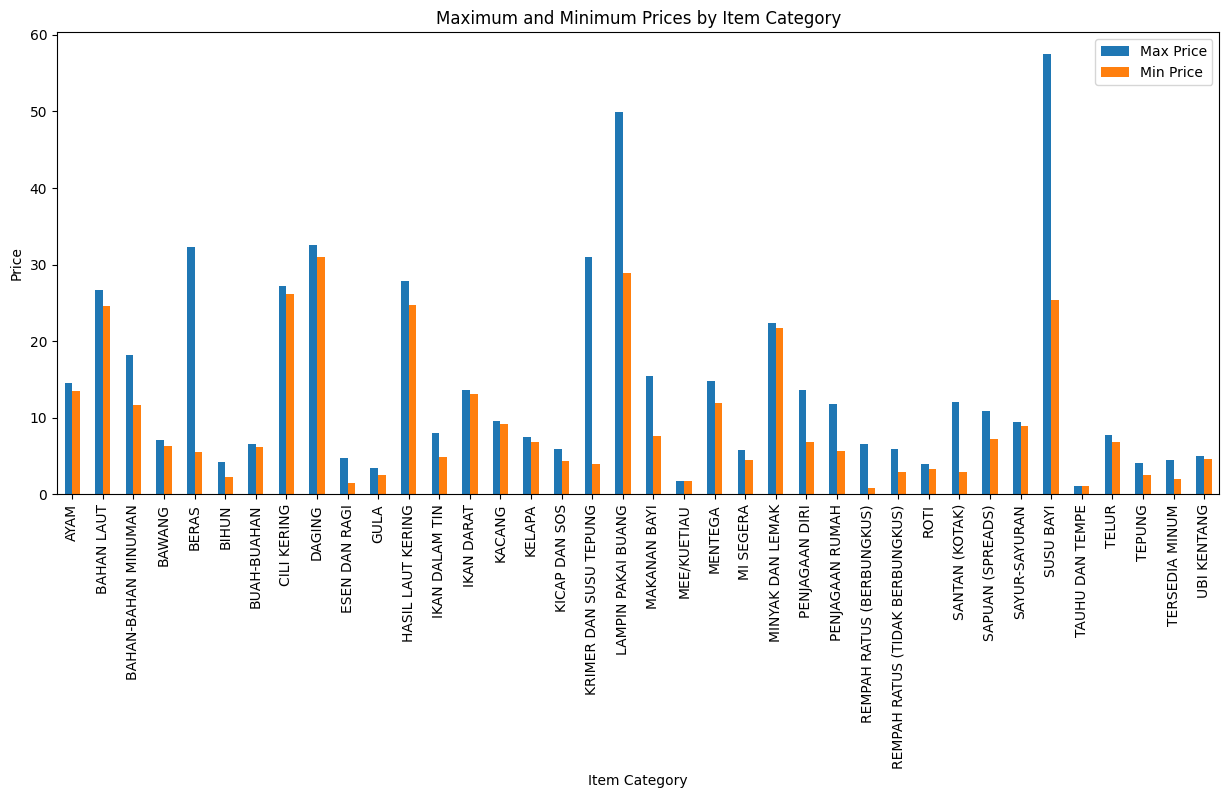

In [21]:
price_summary.plot(kind='bar', figsize=(15, 6))
plt.title('Maximum and Minimum Prices by Item Category')
plt.xlabel('Item Category')
plt.ylabel('Price')
plt.xticks(rotation=90)
plt.legend(loc='upper right')
plt.show()

# MODELING

In [22]:
items = PC['item_group'].unique()
print(items)
states = PC['state'].unique()
print(states)

['BARANGAN SEGAR' 'BARANGAN BERBUNGKUS' 'BARANGAN KERING'
 'SUSU DAN BARANGAN BAYI' 'MINUMAN' 'PRODUK KEBERSIHAN']
['Perak' 'W.P. Kuala Lumpur' 'Perlis' 'Selangor' 'Melaka' 'Kelantan'
 'Negeri Sembilan' 'Terengganu' 'Kedah' 'Pahang' 'Sabah' 'Johor'
 'W.P. Putrajaya' 'Pulau Pinang' 'W.P. Labuan' 'Sarawak']


In [25]:
#method to predict item prices by state
import matplotlib.dates as mdates

def forecasting(state):
    item_groups = PC['item_group'].unique()  # Get unique item groups
    num_groups = len(item_groups)
    num_rows = 3
    num_cols = 2

    fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 15))
    fig.subplots_adjust(hspace=0.5)  # Add vertical space between subplots
    axs = axs.ravel()

    for i, item_group in enumerate(item_groups):
        item_group_data = PC[(PC['item_group'] == item_group) & (PC['state'] == state)]
        item_group_data = item_group_data.groupby(['date'])['price'].mean().reset_index()
        item_group_data = pd.DataFrame(item_group_data)
        item_group_data = item_group_data.rename(columns={'date': 'ds', 'price': 'y'})

        model = Prophet()
        model.fit(item_group_data)
        future = model.make_future_dataframe(periods=50)
        forecast = model.predict(future)

        ax = axs[i]
        model.plot(forecast, ax=ax)
        ax.set_title('Price Forecast for ' + item_group + ' in ' + state)
        ax.set_xlabel('Date')
        ax.set_ylabel('Price')

        # Rotate x-labels
        ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))  # Show every month
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

    for i in range(num_groups, num_rows * num_cols):
        fig.delaxes(axs[i])

    plt.tight_layout()
    plt.show()

item_groups = PC['item_group'].unique()


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsxix69_c/b2eqslfu.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsxix69_c/1nw1nl24.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=3754', 'data', 'file=/tmp/tmpsxix69_c/b2eqslfu.json', 'init=/tmp/tmpsxix69_c/1nw1nl24.json', 'output', 'file=/tmp/tmpsxix69_c/prophet_modelwqrlmha5/prophet_model-20231013161809.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
16:18:09 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:18:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonalit

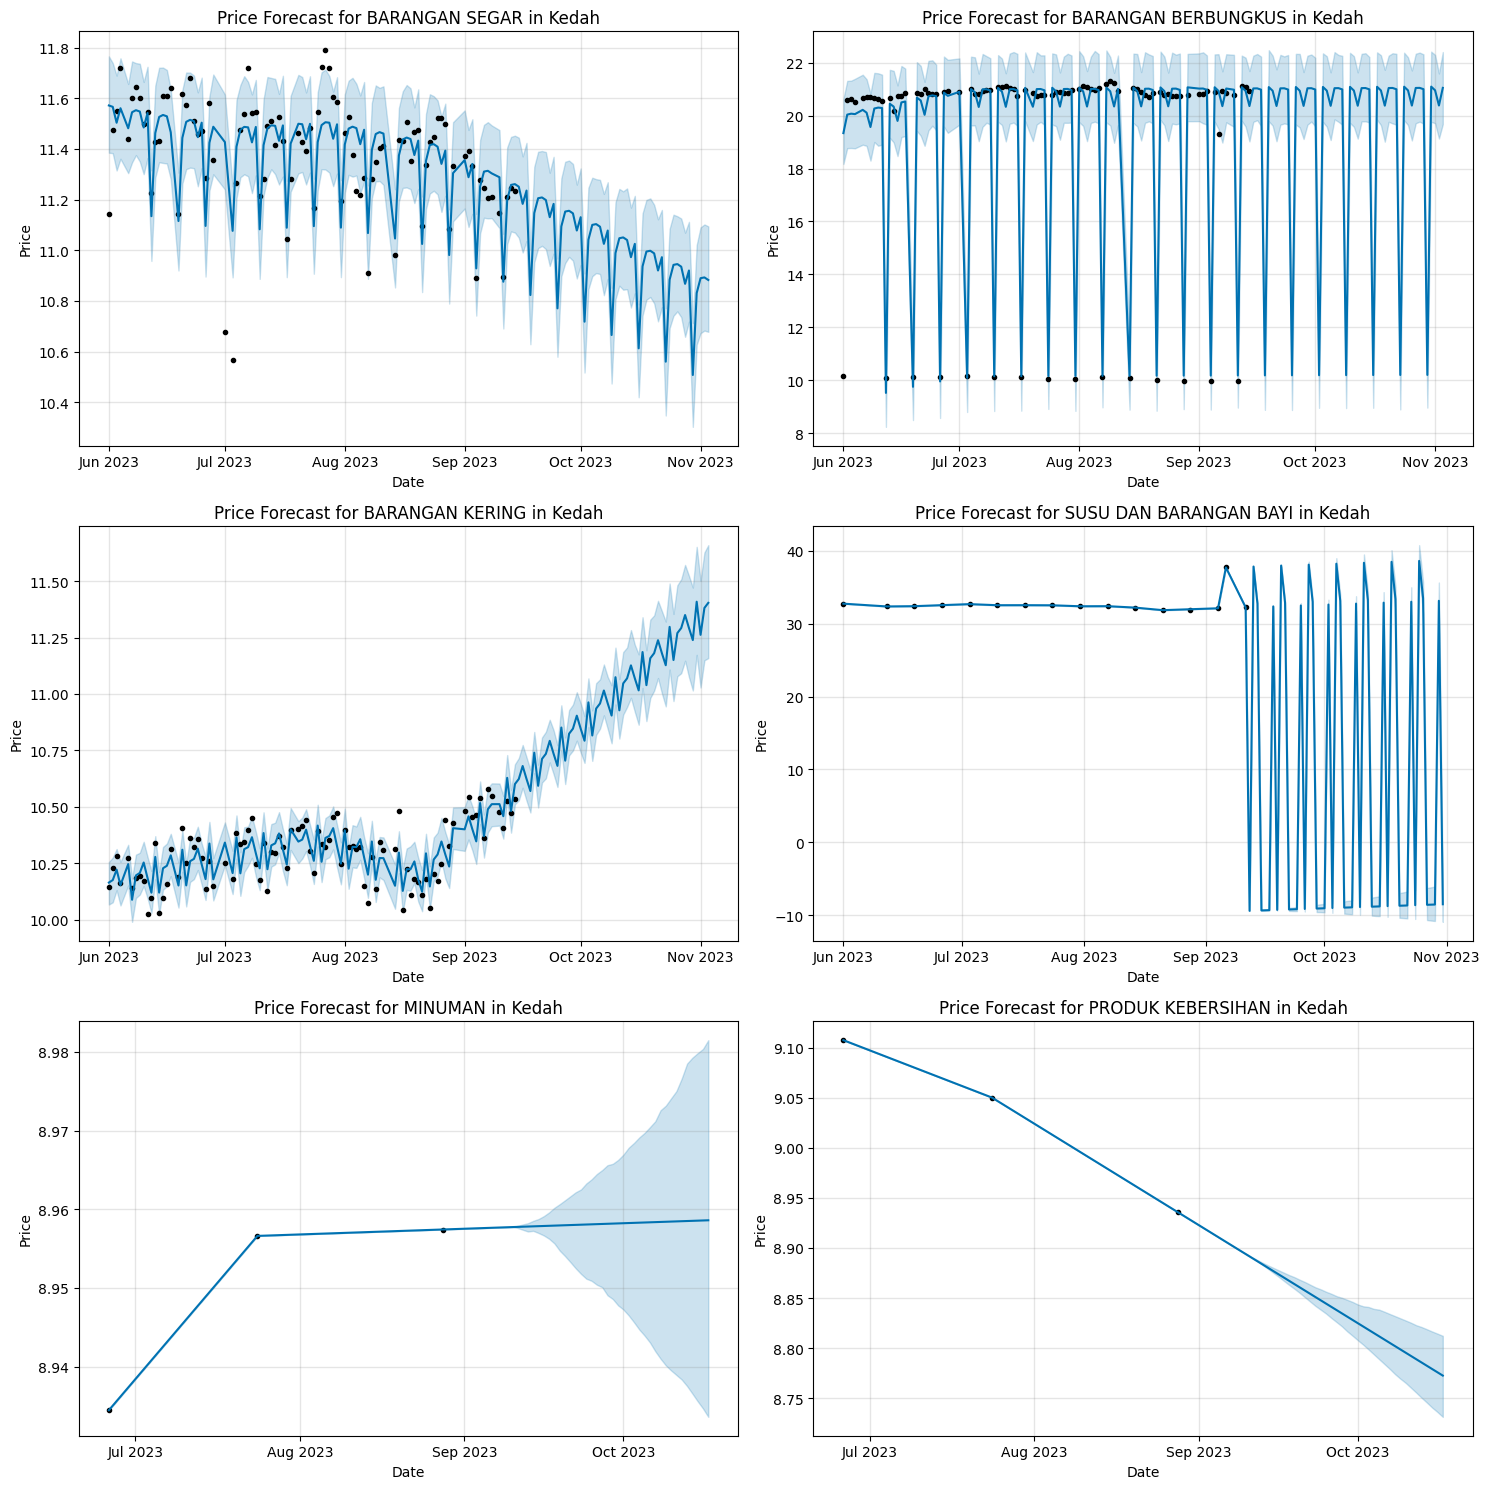

In [26]:
forecasting('Kedah')